In [5]:
from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.toys_configs import Gauss_2_Moons_MLP_FlowMatch as Configs

configs = Configs(DATA = '8Gauss2Moons',
                num_points = 10000,
                data_split_fracs = [0.8976, 0.0, 0.1024],
                batch_size = 256,
                EPOCHS = 1000,
                print_epochs = 100,
                fix_seed = 12345,
                lr = 1e-3,
                dim_hidden = 64, 
                sigma = 0.1,
                solver='dopri5',
                num_sampling_steps=100  
               )

#...set working directory for results:

configs.set_workdir(path='../../results', save_config=True)


#==================================================================================
INFO: created directory: ../../results/8Gauss2Moons.FlowMatch.MLP.2023.11.10_17h37
#==================================================================================
+-----------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Parameters                  | Values                                                                                                                                                                                                                         |
+-----------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
from DynGenModels.datamodules.toys.datasets import Gauss_2_Moons_Dataset 
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader 

toys = Gauss_2_Moons_Dataset(configs)
dataloader = ToysDataLoader(toys, configs)

INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8976/0.0/0.1024
INFO: train size: 8976, validation size: 0, testing sizes: 1024


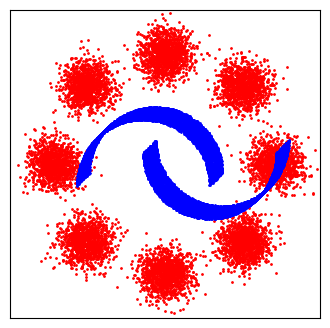

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.scatter(toys.source[..., 0], toys.source[..., 1], s=1, color='red')
plt.scatter(toys.target[..., 0], toys.target[..., 1], s=1, color='blue')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.xticks([])
plt.yticks([])
plt.show()

### 1. Conditional Flow-matching

In [4]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import ConditionalFlowMatching

cfm = DynGenModelTrainer(dynamics = ConditionalFlowMatching(configs),
                         model = MLP(configs), 
                         dataloader = dataloader, 
                         configs = configs)

cfm.train()

2023-11-10 17:04:56.300984: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 17:04:56.851026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline = FlowMatchPipeline(trained_model=cfm,
                             source_input=toys.source[:2000],
                             configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


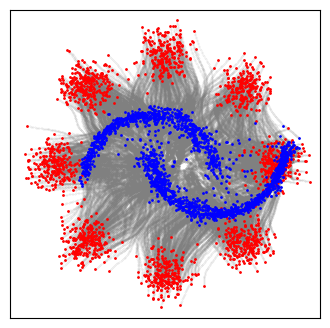

In [13]:
from utils import plot_trajs

plot_trajs(pipeline.trajectories, num_sampling_steps=configs.num_sampling_steps)

### 2. Optimal transport flow-matching

In [7]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching

cfm = DynGenModelTrainer(dynamics = OptimalTransportFlowMatching(configs),
                         model = MLP(configs), 
                         dataloader = dataloader, 
                         configs = configs)

cfm.train()

number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline = FlowMatchPipeline(trained_model=cfm,
                             source_input=toys.source[:2000],
                             configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


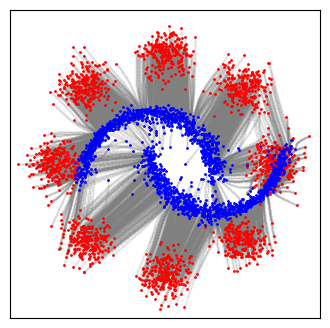

In [9]:
from utils import plot_trajs
plot_trajs(pipeline.trajectories, num_sampling_steps=configs.num_sampling_steps)

### 3. Schrodinger Bridge flow-matching

In [8]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import SchrodingerBridgeFlowMatching

cfm = DynGenModelTrainer(dynamics = SchrodingerBridgeFlowMatching(configs),
                         model = MLP(configs), 
                         dataloader = dataloader, 
                         configs = configs)

cfm.train()

2023-11-10 17:38:12.712633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 17:38:13.326892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	Epoch: 1, train loss: 0.8464491698477001, valid loss: 0  (min valid loss: inf)
	Epoch: 101, train loss: 0.4192247343146138, valid loss: 0  (min valid loss: inf)
	Epoch: 201, train loss: 0.25121326102978647, valid loss: 0  (min valid loss: inf)
	Epoch: 301, train loss: 0.37490144723819363, valid loss: 0  (min valid loss: inf)
	Epoch: 401, train loss: 0.30459060975246954, valid loss: 0  (min valid loss: inf)
	Epoch: 501, train loss: 0.3119221640129884, valid loss: 0  (min valid loss: inf)
	Epoch: 601, train loss: 0.24430848099291327, valid loss: 0  (min valid loss: inf)
	Epoch: 701, train loss: 0.28752701357007027, valid loss: 0  (min valid loss: inf)
	Epoch: 801, train loss: 0.2811617126895322, valid loss: 0  (min valid loss: inf)
	Epoch: 901, train loss: 0.23321761832469037, valid loss: 0  (min valid loss: inf)


In [9]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline = FlowMatchPipeline(trained_model=cfm,
                             source_input=toys.source[:2000],
                             configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


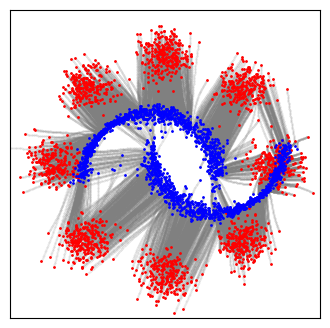

In [10]:
from utils import plot_trajs
plot_trajs(pipeline.trajectories, num_sampling_steps=configs.num_sampling_steps)